In [1]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/Users/shalu/Documents/Covid_Project/Processed dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/shalu/Documents/Covid_Project/Processed dataset/.DS_Store
/Users/shalu/Documents/Covid_Project/Processed dataset/train/.DS_Store
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0927-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0427-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-1260-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0561-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0757-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0736-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0500-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/NORMAL2-IM-0393-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dataset/train/Normal/IM-0177-0001.jpeg
/Users/shalu/Documents/Covid_Project/Processed dat

In [3]:
import os
path='Processed dataset/'
train_dir='Processed dataset/train/'
test_dir='Processed dataset/val/'
print(len(os.listdir(train_dir)))

3


In /Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/shalu/anaconda

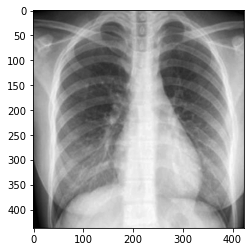

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
path_1='Processed dataset/train/Covid/'
img=path_1+'kjr-21-e25-g001-l-a.jpg'
img=mpimg.imread(img)
plt.imshow(img,cmap='gray')

(1615, 2172)


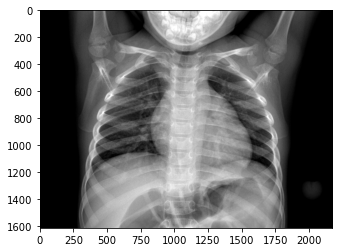

In [5]:
img_2='Processed dataset/train/Normal/IM-0177-0001.jpeg'
img_2=mpimg.imread(img_2)
print(img_2.shape)
plt.imshow(img_2,cmap="gray")

In [6]:
import cv2
def re_size(x):
    img=mpimg.imread(x)
    resized_image=cv2.resize(img,(150,150,3))
    return(resized_img)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_gen=ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
valid_gen=ImageDataGenerator(rescale=1./255)

/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-pack

In [8]:
img_width=150
img_height=150
ch=3
image_shape=(img_height,img_width,ch)
train=train_gen.flow_from_directory(train_dir,target_size=[150,150],color_mode='rgb',batch_size=16,class_mode='binary',shuffle=True)
valid=valid_gen.flow_from_directory(test_dir,target_size=[150,150],color_mode='rgb',batch_size=16,class_mode='binary',shuffle=True)

Found 904 images belonging to 2 classes.
Found 222 images belonging to 2 classes.


In [9]:
import tensorflow as tf
model=tf.keras.Sequential([
                          tf.keras.layers.Conv2D(32,(3,3),input_shape=image_shape,activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                          tf.keras.layers.MaxPooling2D((2,2)),
                          tf.keras.layers.Flatten(),
                          tf.keras.layers.Dense(128,activation='relu'),
                          tf.keras.layers.Dense(1,activation='sigmoid')])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
____

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Recall'])
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
epochs=15
history=model.fit(train,epochs=15,validation_data=valid,callbacks=[early_stop])

Epoch 1/15


/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/shalu/anaconda3/envs/hw5/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/Users/shal

57/57 [==============================] - 48s 848ms/step - loss: 7.2256 - recall: 0.8337 - val_loss: 0.6768 - val_recall: 0.9732
Epoch 2/15
57/57 [==============================] - 39s 685ms/step - loss: 0.0782 - recall: 0.9845 - val_loss: 0.6805 - val_recall: 0.9196
Epoch 3/15
57/57 [==============================] - 40s 698ms/step - loss: 0.0524 - recall: 0.9867 - val_loss: 0.6805 - val_recall: 0.9554
Epoch 4/15
57/57 [==============================] - 40s 697ms/step - loss: 0.0328 - recall: 0.9867 - val_loss: 0.6809 - val_recall: 0.8929
Epoch 5/15
57/57 [==============================] - 40s 705ms/step - loss: 0.0209 - recall: 0.9911 - val_loss: 0.6812 - val_recall: 0.7679
Epoch 6/15
57/57 [==============================] - 42s 729ms/step - loss: 0.0160 - recall: 0.9933 - val_loss: 0.6771 - val_recall: 0.8929
Epoch 7/15
57/57 [==============================] - 40s 706ms/step - loss: 0.0063 - recall: 0.9978 - val_loss: 0.6742 - val_recall: 0.9196
Epoch 8/15
57/57 [====================

In [13]:
print("Mean Recall: %.2f%%" % (np.mean(history.history['recall'])*100))
print("Mean Validation Recall: %.2f%%" % (np.mean(history.history['val_recall'])*100))

Mean Recall: 98.48%
Mean Validation Recall: 84.29%


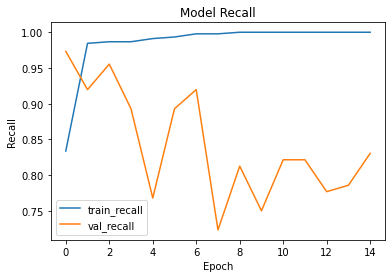

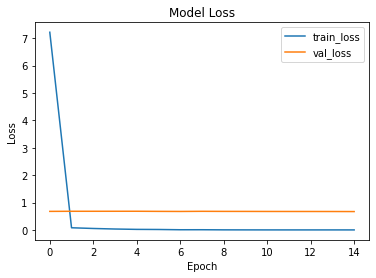

In [14]:
prediction=model.predict(valid)
acc=history.history['recall']
val_acc=history.history['val_recall']

loss=history.history['loss']
val_loss=history.history['val_loss']

plt.title('Model Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.plot(acc,label='train_recall')
plt.plot(val_acc,label='val_recall')
plt.legend()
plt.figure(num=2)
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss,label='train_loss')
plt.plot(val_loss,label='val_loss')
plt.legend()